### Basic imports

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1 Reading images with OpenCV

In [3]:
# It will read already in numpy array
img = cv2.imread('carparking.jpg') # return in BGR
# Since imread does not allert about missing image, let's check
if img is None:
    print('- Image is missing! Check...')

In [4]:
type(img)

numpy.ndarray

In [5]:
### Showing image with cv2 is more work...

In [6]:
# Using cv2.imshow 
# - expect BGR
# - Has to use waitKey(0) and destroy after
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
# Will get the red channel
img1 = img[:,:,2]
print(img1.shape)
height, width = img1.shape

(740, 1440)


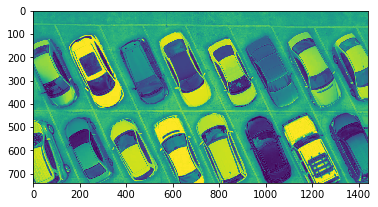

In [8]:
plt.imshow(img1) # WEIRD COLORS? But notice that the red cars are on the bottom

In [ ]:
# CAUTION!
# matplotlib --> expect RGB
# opencv --> expect BGR

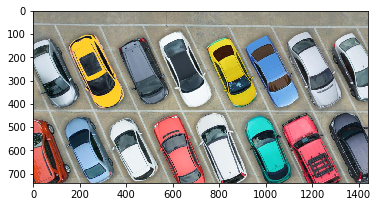

In [42]:
# Use opencv to convert color scheme: RGB --> 
img2 = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(img2)

ysize: 370
xsize: 480
y: 1
x: 0


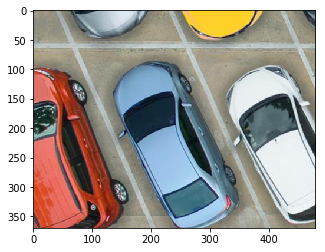

In [44]:
# Split image
def split_img(img,nhorizontal,nvertical,n):
    # Function will split and return the image counting from Left to Down
    # n starting from "0"
    [height,width,_] = img.shape
    xsize = width // nhorizontal
    ysize = height // nvertical
    y = n // nhorizontal  # quocient
    x = n % nhorizontal # remainder
    print('ysize:',ysize)
    print('xsize:',xsize)
    print('y:',y)
    print('x:',x)
    return img[y*ysize:(y+1)*ysize, x*xsize:(x+1)*xsize, :] 

plt.imshow(split_img(img2,3,2,3))

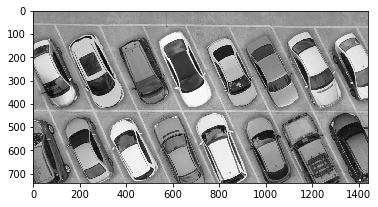

In [10]:
# Reading in gray scale
img3 = cv2.imread('carparking.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(img3,cmap='gray')

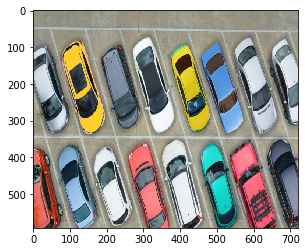

In [11]:
# Resizing: give the dimension
height, width, nchannels = img2.shape
w_ratio = 0.5
h_ratio = 0.8
img4 = cv2.resize(img2,(int(width*w_ratio),int(height*h_ratio)))
plt.imshow(img4)

### Drawing boxes

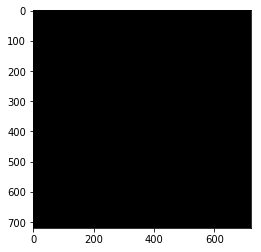

In [25]:
black_box = np.zeros([720,720,3],dtype=np.int16)
plt.imshow(black_box)

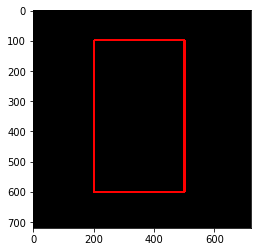

In [26]:
# Drawing a rectangle --> IMPORTANT: will draw inplace
#                      LeftTop(x,y)   RightBot(x,y)         R  G B
cv2.rectangle(black_box,pt1=(200,100),pt2=(500,600),color=(255,0,0),thickness=5)
plt.imshow(black_box)

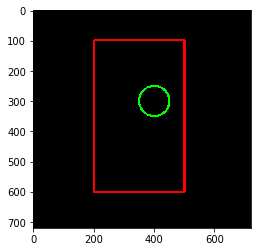

In [27]:
cv2.circle(black_box,center=(400,300),radius=50,color=(0,255,0),thickness=5)
plt.imshow(black_box)

## Load, convert and save image

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

bgr_img = cv2.imread('carparking.jpg')
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
cv2.imwrite('carparking_grayscale.jpg',gray_img)

plt.imshow(gray_img, cmap = plt.get_cmap('gray'))
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

#while True:
#    k = cv2.waitKey(0) & 0xFF    # 0xFF? To get the lowest byte.
#    if k == 27: break            # Code for the ESC key